## *Statistics coded:* Comparative price levels of consumer goods and services

Prepared by [**Mattia Girardi**](m.girardi3@studenti.unipi.it) (EMOS).

This notebook aims at illustrating the *Statistics Explained* article on [Comparative price levels of consumer goods and services](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Comparative_price_levels_of_consumer_goods_and_services). In particular, the aim of this article is carrying put an analysis for the price levels for consumer goods and services in the [European Union (EU)](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Glossary:European_Union_(EU)).

Data are based on [Price Level Indices (PLIs)](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Glossary:Price_level_index_(PLI)), which provide a comparison of countries' price levels relative to the EU average and are calculated using [Purchasing Power Parities](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Glossary:Purchasing_power_parities_(PPPs)).


### Settings

In this work I will use three main packages:
* [**Eurostat**](https://pypi.org/project/eurostat/), for retrieving data;
* [**Pandas**](https://pandas.pydata.org), for manipulating data;
* [**Plotly**](https://plotly.com), for plotting interactive graphs.

In [1]:
# Importing the packages that are used across the project
import eurostat
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

---

### Representing Data

### 1 *Overall Price Levels*

### 1.1 Introduction
    
In this section, the countries analyzed are the [27 EU Member States](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Glossary:European_Union_(EU)), United Kingdom, three [EFTA](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Glossary:European_Free_Trade_Association_(EFTA)) countries (Iceland, Norway and Switzerland), five [candidate ](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Glossary:Candidate_countries) countries (Albania, Montenegro, North Macedonia, Serbia and Turkey) and one [potential](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Glossary:Potential_candidates&redirect=no) candidate country (Bosnia and Herzegovina); as well as, the United States and Japan (for having an extra-EU comparison).

In the following code, data are retrieved using the [**Eurostat**](https://pypi.org/project/eurostat/) Python package.

First of all, I create a variable that stores all the available datasets (in 'dataframe' format); this will help me in picking up the required dataset.

---

In [2]:
# I retrieve and save all the available datasets in a dataframe

toc_df = eurostat.get_toc_df()

---

In *toc_df* it is saved the metadata for each dataset listed, not the data. For extracting data, it is required a *code*, which is contained in the second column of *toc_df* dataframe.
So, I select the dataset that I need for this section, which has a title named 'Comparative price levels'. In order to pick the information about that, I use the function *eurostat.subset_toc_df*, which allows me to search for the info I need, filtering for a specific string, *'comparative price'*.

---

In [3]:
# Filtering for the dataset I search for developing my project
toc_df_subset = eurostat.subset_toc_df(toc_df, 'comparative price')

---

Now, I can get the *code* required for extracting data, printing *toc_df_subset*.

---

In [4]:
print(toc_df_subset)

                         title      code   type last update of data  \
7544  Comparative price levels  tec00120  table          18.06.2020   

     last table structure change data start data end  
7544                  18.06.2020       2008     2019  


---

The required *code* is reported in the second columns; therefore, by inserting it in the function *eurostat.get_data_df* I can extract the data bulk.

---

In [5]:
# Retrieving the dataset and saving it in a variable
df = eurostat.get_data_df('tec00120')
print(df.head())
df1 = df.drop(index = [10,15,17,44])
print(df1.head())

         na_item ppp_cat geo\time   2008   2009   2010   2011   2012   2013  \
0  PLI_EU27_2020    E011       AL   56.7   54.3   51.3   50.0   48.9   49.6   
1  PLI_EU27_2020    E011       AT  105.4  106.8  106.6  107.4  108.0  108.6   
2  PLI_EU27_2020    E011       BA   56.9   56.8   56.1   55.8   55.0   54.4   
3  PLI_EU27_2020    E011       BE  110.8  111.7  111.3  111.2  111.5  111.9   
4  PLI_EU27_2020    E011       BG   51.4   53.8   53.0   52.0   51.8   50.9   

    2014   2015   2016   2017   2018   2019  
0   50.2   48.3   51.1   51.4   54.1   56.9  
1  109.4  109.3  110.5  111.8  112.0  113.0  
2   54.5   53.8   53.3   54.5   54.3   54.8  
3  111.3  111.2  113.4  114.3  114.8  114.7  
4   49.4   49.7   49.7   51.3   52.0   52.8  
         na_item ppp_cat geo\time   2008   2009   2010   2011   2012   2013  \
0  PLI_EU27_2020    E011       AL   56.7   54.3   51.3   50.0   48.9   49.6   
1  PLI_EU27_2020    E011       AT  105.4  106.8  106.6  107.4  108.0  108.6   
2  PLI_EU27_

---

In order to have a clear understanding of the data I will use, I print out the *dictionary* for the data category: data are codified through alpha-numeric format and categorized according to their scope. The *dictionary* explains the meaning of each *category code*.

This procedure will be particularly useful for the sections in which I will deal with multiple categories.

---

In [6]:
# Saving a dictionary for understanding categories
dic = eurostat.get_dic('ppp_cat')
print(dic)

{'GDP': 'Gross domestic product', 'A01': 'Actual individual consumption', 'A0101': 'Food and non-alcoholic beverages', 'A010101': 'Food', 'A01010101': 'Bread and cereals', 'A01010102': 'Meat', 'A01010103': 'Fish', 'A01010104': 'Milk, cheese and eggs', 'A01010105': 'Oils and fats', 'A01010106': 'Fruits, vegetables, potatoes', 'A01010199': 'Other food', 'A010102': 'Non-alcoholic beverages', 'A0102': 'Alcoholic beverages, tobacco and narcotics', 'A010201': 'Alcoholic beverages', 'A010202': 'Tobacco', 'A0103': 'Clothing and footwear', 'A010301': 'Clothing', 'A010302': 'Footwear', 'A0104': 'Housing, water, electricity, gas and other fuels', 'A010405': 'Electricity, gas and other fuels', 'A0105': 'Household furnishings, equipment and maintenance', 'A010501': 'Furniture and furnishings, carpets and other floor coverings', 'A010503': 'Households appliances', 'A0106': 'Health', 'A010603': 'Hospital Services', 'A0107': 'Transport', 'A010701': 'Personal transport equipment', 'A010703': 'Transport

---
### 1.2 Data analysis for price levels

After that, I move to data manipulation. I want to represent the image below.


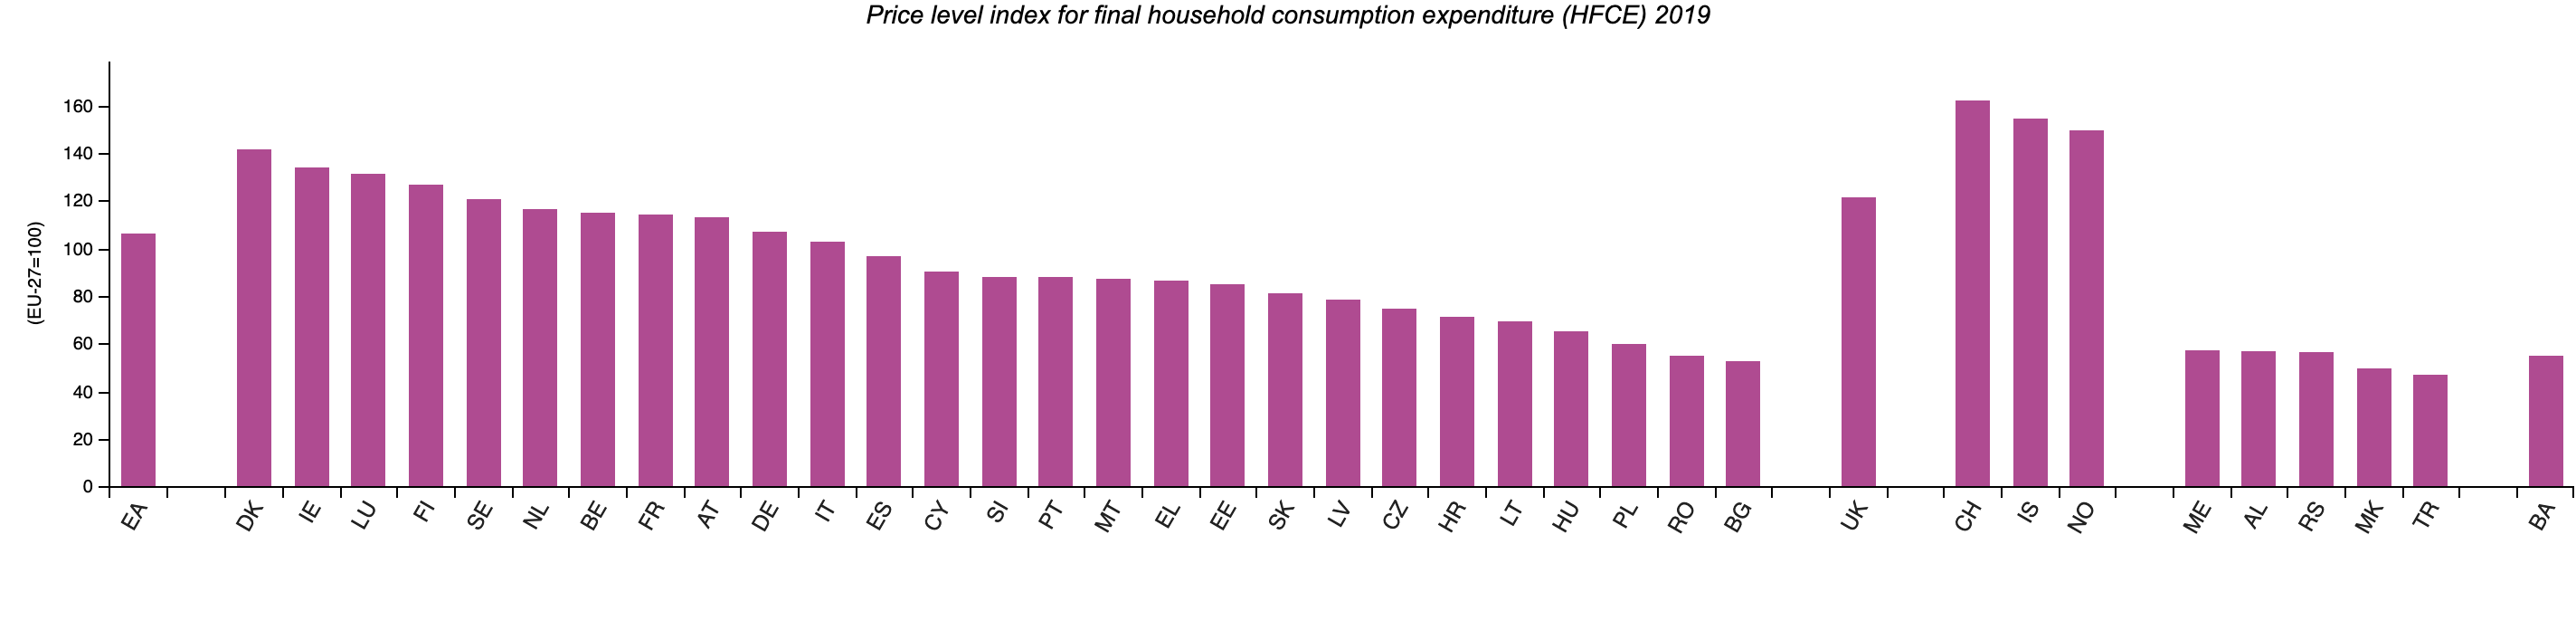


Despite the above image, I am going to represent a plot which shows different colours for the Countries'categories, their status with respect to the EU.

To do this, I use a *for loop*:

* I create an empty list;
* I write a for loop that, depending on the text reported in every single row, it will associate a macro-area country by country;
* each for loop result is appended to the empty list, so, given the main-dataframe order, there will correspond a given area,
* I create a new dataset variable adding the list I have made.

---

In [7]:
# Writing the for loop

area = []
for i in df1['geo\\time']:
    if i == 'JP' or i == 'US' or i == 'TR' or i == 'MK' or i == 'RS' or i == 'ME' or i == 'AL' or i == 'BA' or i == 'ME':
        area.append('Etxra-EU')
    elif i == 'UK':
        area.append('Former EU')
    elif i == 'EA19' or i == 'EU27_2020':
        area.append('Aggregate EU')
    else:
        area.append('EU')
        
# Inserting the list to the dataset

df1['area'] = area

# check the dataset

print(df1.head())


         na_item ppp_cat geo\time   2008   2009   2010   2011   2012   2013  \
0  PLI_EU27_2020    E011       AL   56.7   54.3   51.3   50.0   48.9   49.6   
1  PLI_EU27_2020    E011       AT  105.4  106.8  106.6  107.4  108.0  108.6   
2  PLI_EU27_2020    E011       BA   56.9   56.8   56.1   55.8   55.0   54.4   
3  PLI_EU27_2020    E011       BE  110.8  111.7  111.3  111.2  111.5  111.9   
4  PLI_EU27_2020    E011       BG   51.4   53.8   53.0   52.0   51.8   50.9   

    2014   2015   2016   2017   2018   2019      area  
0   50.2   48.3   51.1   51.4   54.1   56.9  Etxra-EU  
1  109.4  109.3  110.5  111.8  112.0  113.0        EU  
2   54.5   53.8   53.3   54.5   54.3   54.8  Etxra-EU  
3  111.3  111.2  113.4  114.3  114.8  114.7        EU  
4   49.4   49.7   49.7   51.3   52.0   52.8        EU  


---

Now, I can represent the barplot.

---

In [8]:
fig = px.bar(df1, x = 'geo\\time', y = 2019, labels = dict(area = 'Area'),
             color = "area", color_discrete_sequence = ["orange", "blue","crimson", "steelblue"], opacity = 0.8)
fig.update_xaxes(tickangle = 45)
fig.update_layout(title = 'Price Level Index for Final Household Consumption Expenditure 2019',
                  xaxis = {'categoryorder':'array', 'categoryarray':['EU27_2020','EA19', 'AT', 'BE', 'BG', 'CH','CY','CZ', 'DE',
                   'DK', 'EE', 'EL', 'ES', 
                   'FI', 'FR',
                   'HR', 'HU', 'IE', 'IS', 'IT', 'LT',
                   'LU', 'LV', 'MT', 'NL','NO', 'PL',
                   'PT', 'RO', 'SE', 'SI', 'SK','UK','AL','BA','ME','MK','RS','TR','US','JP']},
                  showlegend = False)
fig.layout.template = 'plotly_white'
fig.update_xaxes(title="Countries")
fig.show()


---

Then, I want to create a graph representing even the data for 2018, comparing the results, with a graph that is similar to the previous one. 

This time I proceed using a *for loop* assigning a color for each *area*; in this way, I can make a barplot assigning pre-defined colours for each *area*.

---

In [9]:
# Comparative price level for 2018 & 2019

colors = []
for i in df1['area']:
    if i == 'Etxra-EU':
        colors.append('orange')
    elif i == 'Former EU':
        colors.append('steelblue')
    elif i == 'Aggregate EU':
        colors.append('crimson')
    else:
        colors.append('blue')

df2 = df1
df2['color'] = colors

fig = go.Figure()

fig.add_trace(go.Bar(x = df2['geo\\time'], y = df2[2018],
                name = '2018', marker_color = df2['color']))

fig.add_trace(go.Bar(x = df2['geo\\time'], y = df2[2019],
                name = '2019', marker_color = df2['color'], opacity = 0.6))
fig.update_xaxes(tickangle = 45)
fig.layout.template = 'plotly_white'
fig.update_layout(
    title = 'Price Level Index for Final Household Consumption Expenditure for 2019 and 2018\
    <br>(the opaque colors are for 2018)',
    xaxis = {'categoryorder':'array', 'categoryarray':['EU27_2020', 'EA19', 'AT', 'BE', 'BG', 'CH', 'CY', 'CZ', 'DE',
                   'DK', 'EE', 'EL', 'ES', 
                   'FI', 'FR',
                   'HR', 'HU', 'IE', 'IS', 'IT', 'LT',
                   'LU', 'LV', 'MT', 'NL', 'NO', 'PL',
                   'PT', 'RO', 'SE', 'SI', 'SK', 'UK', 'AL', 'BA', 'ME', 'MK', 'RS', 'TR', 'US', 'JP']}, 
    yaxis = dict(
        title = 'Values (€)',
        titlefont_size = 15,
        tickfont_size = 14,
    ), showlegend = True
    )
fig.update_xaxes(title="Countries")        
fig.show()



---

### 1.3 Price level index sorted

Now, I want to represent the data for [HCFE](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Glossary:Household_final_consumption_expenditure_(HFCE)) by an increasing order, through a plot similar to the following image.

---

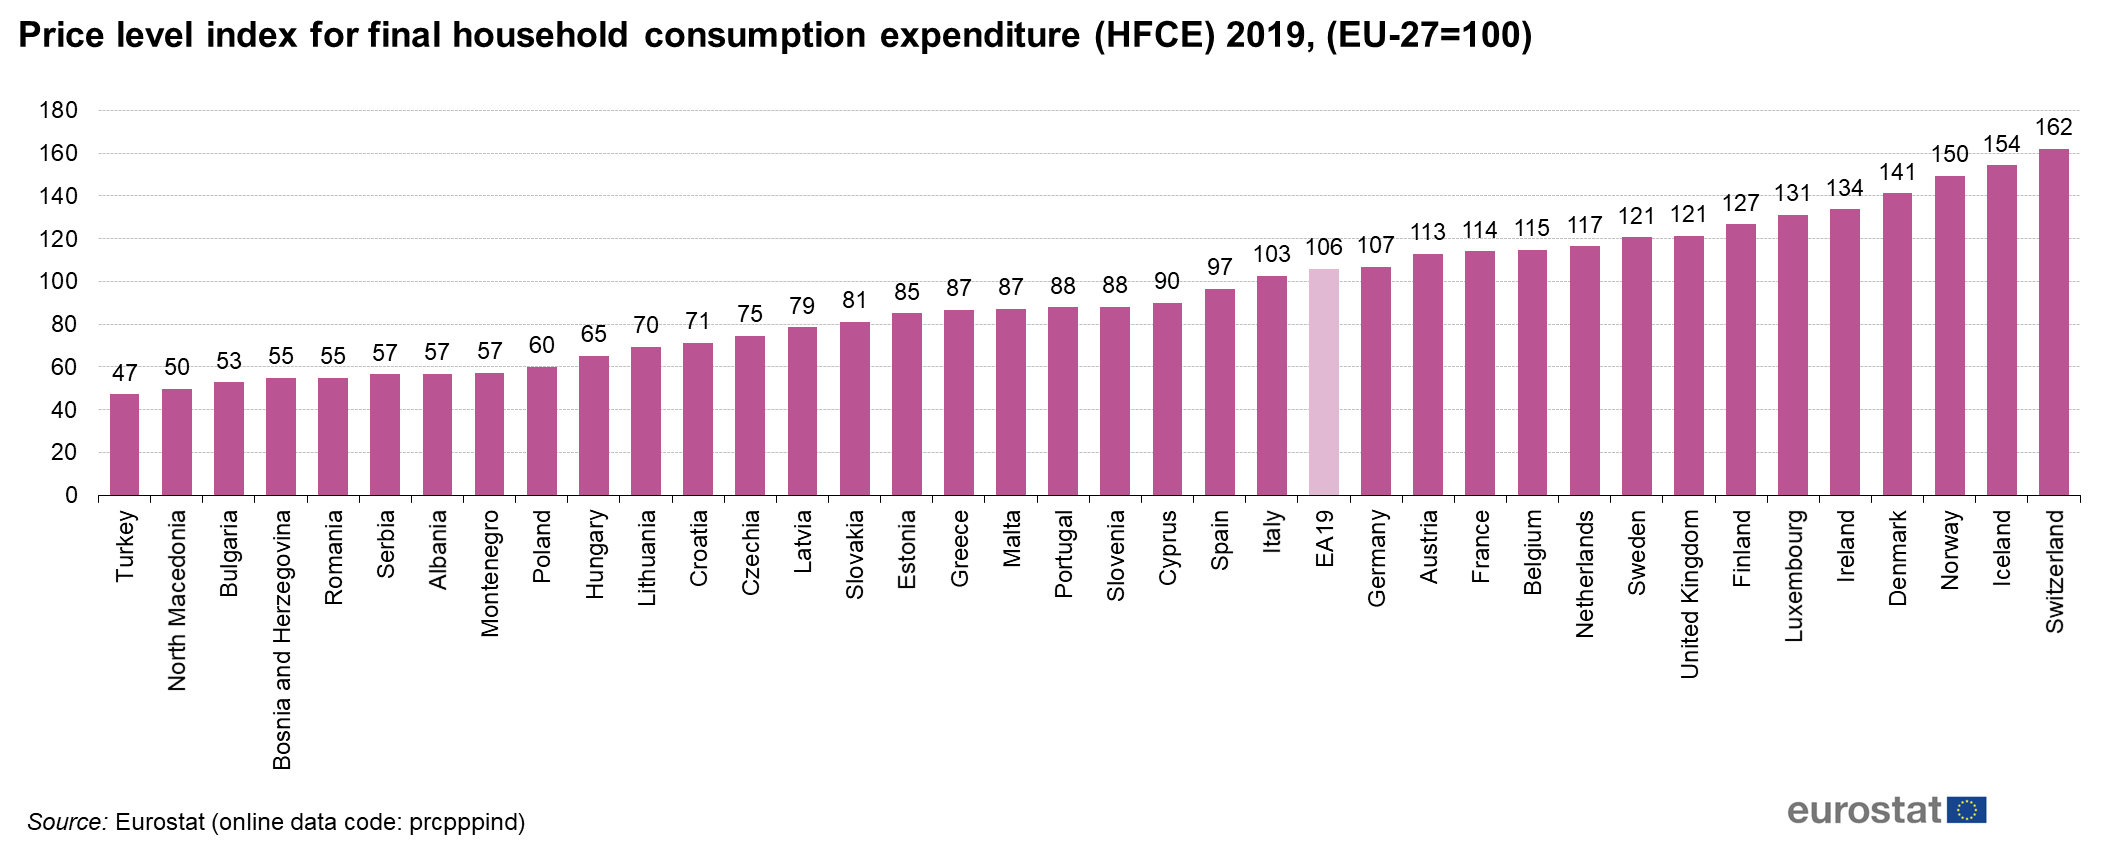

However, instead of reporting values at the top of the bar, I will plot an interactive graph.


Through the following code I define the color for all of the countries, then I assign a different colo for [EA19]. After that I have just to create a plot, defining the *ascending* order.

---

In [10]:
# Overall price level

# Defining the colors

colors2 = ['purple'] * 38
colors2[10] = 'orange'

# Remove the rows that will not be useful for mine purposes

df2 = df1.drop(index = [16,25,43])

# Plotting the graph

fig = px.bar(df2, x = 'geo\\time', y = 2019, labels = dict(countries = 'Countries'), color = colors2, opacity = 0.8)
fig.update_xaxes(tickangle = 45)
fig.layout.template = 'plotly_white'
fig.update_layout(title ='Price Level Index for Final Household Consumption Expenditure 2019 (EU-27=100)',
                  xaxis ={'categoryorder':'total ascending'}, 
                  showlegend = False)
fig.update_xaxes(title="Countries")
fig.update_yaxes(title="Values") 
fig.show()

---

### 2 *Households consumption*

### 2.1 Introduction

According to [Eurostat](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Comparative_price_levels_of_consumer_goods_and_services), Households spend more than a half (55%) of their total consumptions in the following goods/services:

* Food and non-alcoholic beverages, 17%;
* Alcoholic beverages and tobacco 5%;
* Clothing, 4%;
* Footwear, 1%.
* Energy (electricity, gas and other fuels), 5%;
* Furniture and furnishing, 2%;
* Household appliances, 2%;
* Consumer electronics, 1%.
* Personal transport equipment, 3%;
* Transport services, 3%;
* Communication (services and equipment), 3%;
* Restaurants & Hotels, 1%.

The data concerning that info were represented in tabular form and compared with the [HCFE](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Glossary:Household_final_consumption_expenditure_(HFCE)), like the following one.

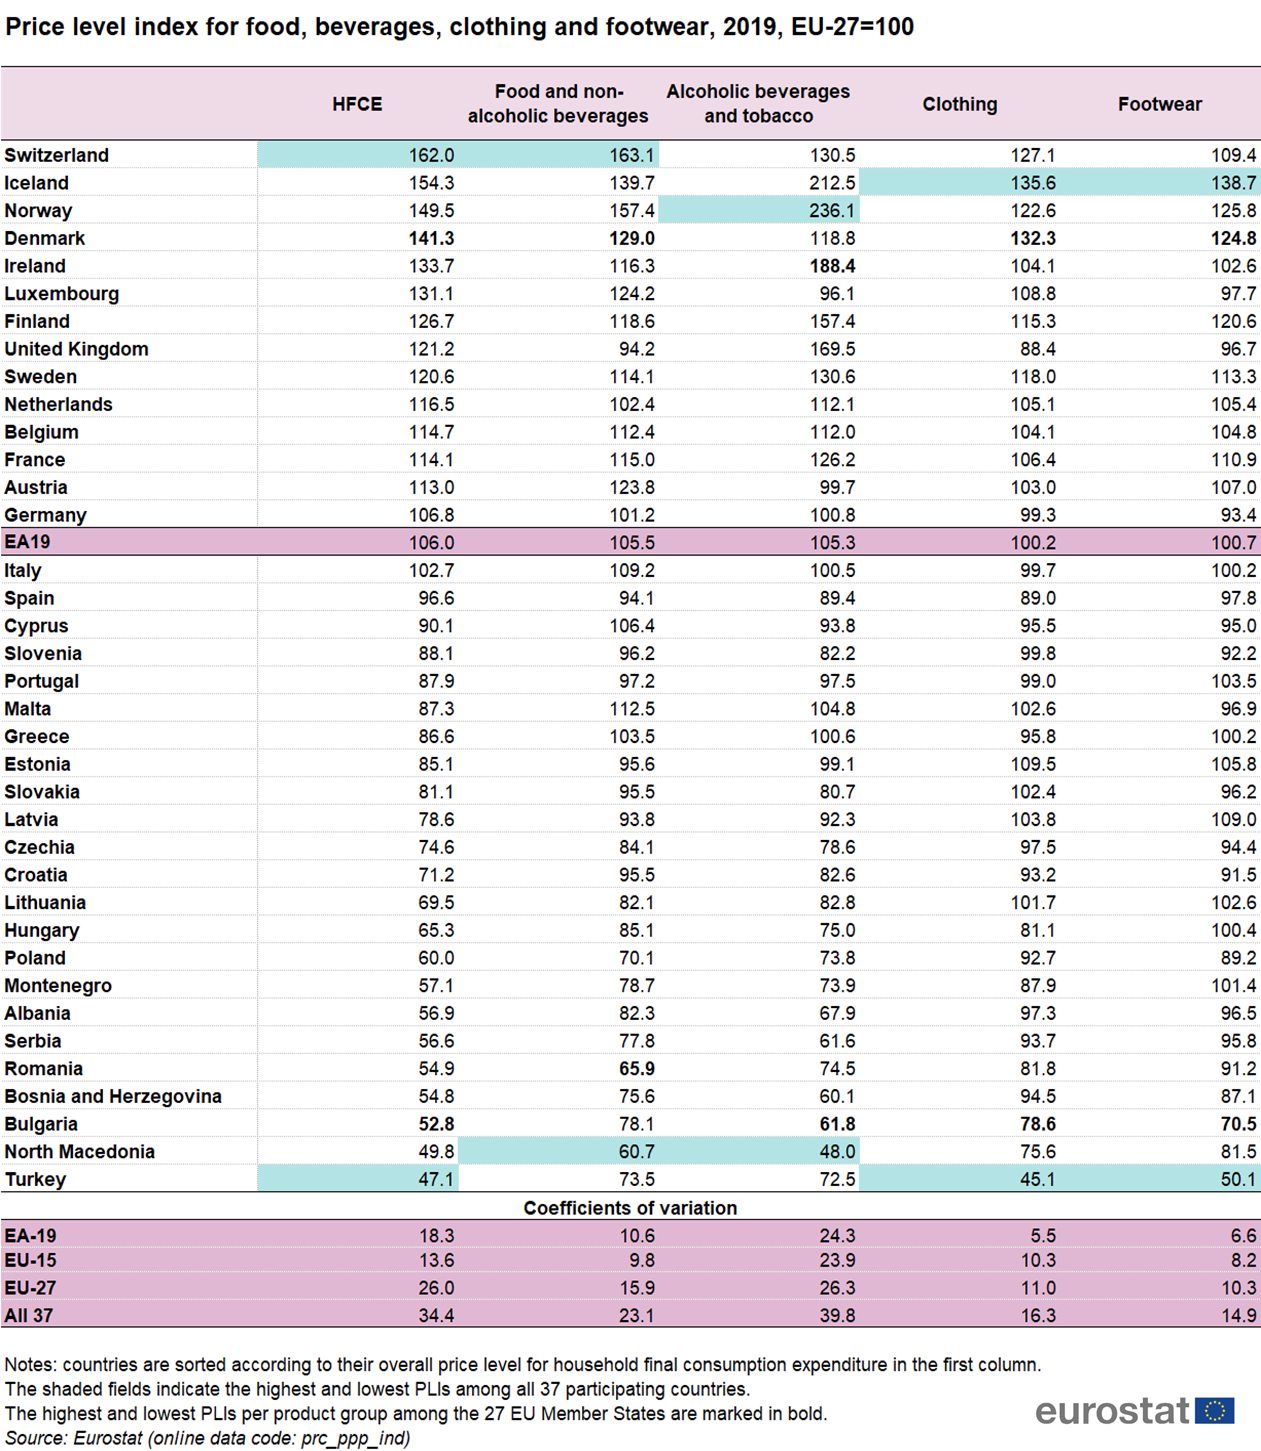

---

Despite the tabular representation, through the following strings, I want to shape interactive bar-plots, making subplots for each category, for having a better visual presentation.


Therefore, I start by retrieving data through the *eurostat.get_data_df*, which extract data by code (*prc_ppp_ind*), and save it in a variable.
Then, I select just the data referring to the [Price Level Indices (PLIs)](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Glossary:Price_level_index_(PLI)) for the 27 EU members (updated in 2020), filtering by the *.loc* command. I use this last command even for filtering only the countries listed at the beginning of the article.

---

In [13]:
# Retrieving data for tables' plots

table_1 = eurostat.get_data_df('prc_ppp_ind')

# filtering data by index

tab3_2 = table_1.loc[table_1['na_item'] == "PLI_EU27_2020"]

# filtering data by countries

tab3_3 = tab3_2.loc[(tab3_2['geo\\time'] == 'EA19') | (tab3_2['geo\\time'] == 'AT') | (tab3_2['geo\\time'] == 'BE')| 
                  (tab3_2['geo\\time'] == 'BG') | (tab3_2['geo\\time'] == 'CH') | (tab3_2['geo\\time'] == 'CY')
                  | (tab3_2['geo\\time'] == 'CZ') | (tab3_2['geo\\time'] == 'DE') | (tab3_2['geo\\time'] == 'DK')
                  | (tab3_2['geo\\time'] == 'EE') | (tab3_2['geo\\time'] == 'EL') | (tab3_2['geo\\time'] == 'ES')
                  | (tab3_2['geo\\time'] == 'FI') | (tab3_2['geo\\time'] == 'FR') | (tab3_2['geo\\time'] == 'HR' )
                  | (tab3_2['geo\\time'] == 'HU') | (tab3_2['geo\\time'] == 'IE')
                  | (tab3_2['geo\\time'] == 'IS') | (tab3_2['geo\\time'] == 'IT') | (tab3_2['geo\\time'] == 'LT')
                  | (tab3_2['geo\\time'] == 'LU') | (tab3_2['geo\\time'] == 'LV') | (tab3_2['geo\\time'] == 'MT')
                  | (tab3_2['geo\\time'] == 'NL') | (tab3_2['geo\\time'] == 'NO') | (tab3_2['geo\\time'] == 'PL')
                  | (tab3_2['geo\\time'] == 'PT') | (tab3_2['geo\\time'] == 'RO') | (tab3_2['geo\\time'] == 'SE')
                  | (tab3_2['geo\\time'] == 'SI') | (tab3_2['geo\\time'] == 'SK') | (tab3_2['geo\\time'] == 'UK')
                  | (tab3_2['geo\\time'] == 'AL') | (tab3_2['geo\\time'] == 'BA') | (tab3_2['geo\\time'] == 'ME') 
                  | (tab3_2['geo\\time'] == 'MK') | (tab3_2['geo\\time'] == 'RS') | (tab3_2['geo\\time'] == 'TR')]



---

### 2.2 Price levels for food, beverages, tobacco, clothing and footwear 

Now, I am going to represent [Table 1](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=File:Price_level_index_for_food,_beverages,_clothing_and_footwear,_2019,_EU-27%3D100_v2.png).

To do this, I filter data for the goods'/services' categories (using the codes provided in the above-represented dictionary). The codes are:
* A0101, indicating Food and non-alcoholic beverages;
* A0102, indicating Alcoholic beverages, tobacco and narcotics;
* A010301, indicating Clothing;
* A010302, for Footwear category.

Then, by a *for loop*, I assign the string that allows interpreting each category code.

---

In [14]:
# TABLE 1

# Price levels for food, beverages, tobacco, clothing and footwear

# Filtering for categories
final1 = tab3_3.loc[(tab3_3['ppp_cat'] == "A0101") | (tab3_3['ppp_cat'] == "A0102") |
                    (tab3_3['ppp_cat'] == "A010301")  | (tab3_3['ppp_cat'] == "A010302")]

# Explicating categories' codes

category1 = []
for i in final1['ppp_cat']:
    if i == 'A0101': 
        category1.append('Food and non-alcoholic beverages')
    elif i == 'A0102':
        category1.append('Alcoholic beverages, tobacco and narcotics')
    elif i == 'A010301':
        category1.append('Clothing')
    else:
        category1.append('Footwear')
final1['ppp_cat_expl1'] = category1

print(final1.head())



             na_item ppp_cat geo\time   2019   2018   2017   2016   2015  \
34963  PLI_EU27_2020   A0101       AL   82.3   78.4   71.9   71.3   68.9   
34964  PLI_EU27_2020   A0101       AT  123.8  124.2  124.1  122.8  121.9   
34965  PLI_EU27_2020   A0101       BA   75.6   75.7   76.4   74.0   75.0   
34966  PLI_EU27_2020   A0101       BE  112.4  113.5  112.2  111.7  109.7   
34967  PLI_EU27_2020   A0101       BG   78.1   75.8   75.3   71.1   71.1   

        2014   2013                ...                  2003  2002  2001  \
34963   68.1   68.2                ...                   NaN   NaN   NaN   
34964  121.0  120.8                ...                 111.4   NaN   NaN   
34965   75.5   75.5                ...                   NaN   NaN   NaN   
34966  108.8  111.9                ...                 109.9   NaN   NaN   
34967   70.8   70.3                ...                  55.0   NaN   NaN   

       2000  1999  1998  1997  1996  1995                     ppp_cat_expl1  
34963   

/Users/mattiagirardi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



---

After editing the dataset, I move to adjust it for the five subplots (one for each category previously mentioned and one for HCFE.

First of all, I subset the main-dataset by category.
Secondly, I make the subplot for [HCFE](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Glossary:Household_final_consumption_expenditure_(HFCE)) (filtering for its code, *EO11*). This subplot will be used across all of three graphs in this section. I use the same already described technique for filtering and explicating the category code. Besides, I assign the bar-colour to a variable. Furthermore, since I want to highlight the highest and lowest values, I *reset the index* of the dataset, using *.reset_index*. I am going to define a different colour for the maximum and minimum values by *.max and .min* functions, and, by their results, I will locate the index, *final1hcfe.index[final1hcfe[2019] == maxhcfe]*, corresponding to max and min, storing this result in a list form, appending *.tolist()* to the previous command. The output of this procedure is an *integer* that will be saved in a variable. This variable will be used for defining a specific colour.

---

In [18]:
# Definig the dataset for each subplot, by filtering the category

s1final1=final1.loc[(tab3_3['ppp_cat'] == "A0101")]
s2final1=final1.loc[(tab3_3['ppp_cat'] == "A0102")]
s3final1=final1.loc[(tab3_3['ppp_cat'] == "A010301")]
s4final1=final1.loc[(tab3_3['ppp_cat'] == "A010302")]

## SUBPLOT for HFCE

# Making a subset

final1hcfe = tab3_3.loc[(tab3_3['ppp_cat'] == "E011")]

# Explicating the category code for HCFE
hcfe = []
for i in final1hcfe['ppp_cat']:
    if i == 'E011': 
        hcfe.append('HCFE')
final1hcfe['hcfe'] = hcfe

# Defining the color for the bars

colorsub_hcfe = ['royalblue'] * 38

# Resetting indexes to easily find the country corresponding to the max and min value, selecting that index for
# making its bar differently-coloured

final1hcfe = final1hcfe.reset_index(drop=True)
final1hcfe.reset_index(drop=True, inplace=True)

# Identifying the highest and lowest values in the subset

maxhcfe = final1hcfe[2019].max()
minhcfe = final1hcfe[2019].min()

# Identifying the highest and lowest values in the subset by index and storing the results in variables

max_fhcfe = final1hcfe.index[final1hcfe[2019] == maxhcfe].tolist()
max_fhcfe = max_fhcfe[0]

min_fhcfe = final1hcfe.index[final1hcfe[2019] == minhcfe].tolist()
min_fhcfe = min_fhcfe[0]

# Assigning different color to max and min values

colorsub_hcfe[max_fhcfe] = ['midnightblue']
colorsub_hcfe[min_fhcfe] = ['midnightblue']


/Users/mattiagirardi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



---

Then, I use the same method for the other categories' subplots.

---

In [24]:
# Resetting indexes to find the country corresponding to the max and min value, selecting that index for
# making its bar differently-coloured

s1final1 = s1final1.reset_index(drop=True)
s1final1.reset_index(drop=True, inplace=True)
s2final1 = s2final1.reset_index(drop=True)
s2final1.reset_index(drop=True, inplace=True)
s3final1 = s3final1.reset_index(drop=True)
s3final1.reset_index(drop=True, inplace=True)
s4final1 = s4final1.reset_index(drop=True)
s4final1.reset_index(drop=True, inplace=True)

## SUBPLOT1

# Defining the color

colorsub_s1final1 = ['slategrey'] * 38

# Defining the highest value

max_s1final1 = s1final1[2019].max()
f_s1final1 = s1final1.index[s1final1[2019] == max_s1final1].tolist()
f_s1final1 = f_s1final1[0]

# Defining the lowest value

min_s1final1 = s1final1[2019].min()
f_s1final1_min = s1final1.index[s1final1[2019] == min_s1final1].tolist()
f_s1final1_min = f_s1final1_min[0]

# Defining the colors for max and min values

colorsub_s1final1[f_s1final1] = ['midnightblue']
colorsub_s1final1[f_s1final1_min] = ['midnightblue']


## SUBPLOT2

# Defining the color

colorsub_s2final1 = ['dodgerblue'] * 38

# Defining the highest value

max_s2final1 = s2final1[2019].max()
f_s2final1 = s2final1.index[s2final1[2019] == max_s2final1].tolist()
f_s2final1 = f_s2final1[0]

# Defining the lowest value

min_s2final1 = s2final1[2019].min()
f_s2final1_min = s2final1.index[s2final1[2019] == min_s2final1].tolist()
f_s2final1_min = f_s2final1_min[0]

# Defining the colors for max and min values

colorsub_s2final1[f_s2final1] = ['midnightblue']
colorsub_s2final1[f_s2final1_min] = ['midnightblue']


## SUBPLOT3

# Defining the color

colorsub_s3final1 = ['lightsteelblue'] * 38

# Defining the highest value

max_s3final1 = s3final1[2019].max()
f_s3final1 = s3final1.index[s3final1[2019] == max_s3final1].tolist()
f_s3final1 = f_s3final1[0]

# Defining the lowest value

min_s3final1 = s3final1[2019].min()
f_s3final1_min = s3final1.index[s3final1[2019] == min_s3final1].tolist()
f_s3final1_min = f_s3final1_min[0]

# Defining the colors for max and min values

colorsub_s3final1[f_s3final1] = ['midnightblue']
colorsub_s3final1[f_s3final1_min] = ['midnightblue']


## SUBPLOT4

# Defining the color

colorsub_s4final1 = ['steelblue'] * 38

# Defining the highest value

max_s4final1 = s4final1[2019].max()
f_s4final1 = s4final1.index[s4final1[2019] == max_s4final1].tolist()
f_s4final1 = f_s4final1[0]

# Defining the lowest value

min_s4final1 = s4final1[2019].min()
f_s4final1_min = s4final1.index[s4final1[2019] == min_s4final1].tolist()
f_s4final1_min = f_s4final1_min[0]

# Defining the colors for max and min values

colorsub_s4final1[f_s4final1] = ['midnightblue']
colorsub_s4final1[f_s4final1_min] = ['midnightblue']


---

Finally, I plot the subplots.

---

In [25]:
# Plotting

fig = make_subplots(rows=5, cols=1,
                    x_title='Countries',
                    y_title='Values (€)',shared_xaxes=True, shared_yaxes=True)

fig.add_bar(x = final1hcfe['geo\\time'], y = final1hcfe[2019], name='HCFE', marker_color = colorsub_hcfe, row = 1, col = 1)
fig.add_bar(x = s1final1['geo\\time'], y = s1final1[2019], name='Food', marker_color = colorsub_s1final1, row = 2, col = 1)
fig.add_bar(x = s2final1['geo\\time'], y = s2final1[2019], name='Beverages', marker_color = colorsub_s2final1, row = 3, col = 1)
fig.add_bar(x = s3final1['geo\\time'], y = s3final1[2019], name='Clothing', marker_color = colorsub_s3final1, row = 4, col = 1)
fig.add_bar(x = s4final1['geo\\time'], y = s4final1[2019], name='Footwear', marker_color = colorsub_s4final1, row = 5, col = 1)

fig.update_xaxes(tickangle = 45)
fig.layout.template = 'plotly_white'
fig.update_layout(
    title = "Price levels for food, beverages, tobacco, clothing and footwear 2019\
    <br> (darker bars represent the highest and lowest values)", showlegend = True
    )



---

### 2.3 Price levels for energy, furniture, household appliances and consumer electronics

Now, I am going to represent [Table 2](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=File:Price_level_index_for_energy,_furniture,_household_appliances_and_consumer_electronics,_2019,_EU-27%3D100_v2.png).

The methodology is the same used in [*section 2.2*]. There will not be any code referring to [HCFE](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Glossary:Household_final_consumption_expenditure_(HFCE)) since everything was previously defined.
Hereby, the codes analysed refer to the consumption of:
* A010405, Electricity;
* A010501, Furniture;
* A010503, Households appliances;
* A050102, Electronics.

---

In [30]:
# TABLE 2

# Price levels for energy, furniture, household appliances and consumer electronics

# Filtering for categories

final2 = tab3_3.loc[(tab3_3['ppp_cat'] == "A010405") | (tab3_3['ppp_cat'] == "A010501") |
                    (tab3_3['ppp_cat'] == "A010503")  | (tab3_3['ppp_cat']== "A050102")]

# Explicating categories'codes

category2 = []
for i in final2['ppp_cat']:
    if i == 'A010405': 
        category2.append('Electricity')
    elif i == 'A010501':
        category2.append('Furniture')
    elif i == 'A010503':
        category2.append('Households appliances')
    else:
        category2.append('Consumer electronics')
final2['ppp_cat_expl'] = category2
print(final2.head())


             na_item  ppp_cat geo\time   2019   2018   2017   2016   2015  \
35846  PLI_EU27_2020  A010405       AL   45.8   44.7   43.6   42.6   45.3   
35847  PLI_EU27_2020  A010405       AT  103.2  103.7  104.2  105.4  101.1   
35848  PLI_EU27_2020  A010405       BA   50.0   49.8   49.9   50.3   47.1   
35849  PLI_EU27_2020  A010405       BE  110.3  113.0  112.1  106.9   95.7   
35850  PLI_EU27_2020  A010405       BG   56.0   55.9   54.8   52.6   55.2   

        2014   2013      ...        2003  2002  2001  2000  1999  1998  1997  \
35846   58.4   57.7      ...         NaN   NaN   NaN   NaN   NaN   NaN   NaN   
35847  101.6  101.9      ...       109.5   NaN   NaN   NaN   NaN   NaN   NaN   
35848   46.9   47.2      ...         NaN   NaN   NaN   NaN   NaN   NaN   NaN   
35849   95.2   99.2      ...       104.0   NaN   NaN   NaN   NaN   NaN   NaN   
35850   53.7   53.3      ...        48.9   NaN   NaN   NaN   NaN   NaN   NaN   

       1996  1995  ppp_cat_expl  
35846   NaN   NaN   El

/Users/mattiagirardi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [31]:
# Definig the dataset for each subplot, by filtering the category

s1final2=final2.loc[(tab3_3['ppp_cat'] == "A010405")]
s2final2=final2.loc[(tab3_3['ppp_cat'] == "A010501")]
s3final2=final2.loc[(tab3_3['ppp_cat'] == "A010503")]
s4final2=final2.loc[(tab3_3['ppp_cat'] == "A050102")]


In [34]:
# Resetting indexes to find the country corresponding to the max value and selecting that index for
# coloring its bar differently

s1final2 = s1final2.reset_index(drop=True)
s1final2.reset_index(drop=True, inplace=True)
s2final2 = s2final2.reset_index(drop=True)
s2final2.reset_index(drop=True, inplace=True)
s3final2 = s3final2.reset_index(drop=True)
s3final2.reset_index(drop=True, inplace=True)
s4final2 = s4final2.reset_index(drop=True)
s4final2.reset_index(drop=True, inplace=True)

## SUBPLOT1

# Defining the color

colorsub_s1final2 = ['slategrey'] * 38

# Defining the highest value

max_s1final2 = s1final2[2019].max()
f_s1final2 = s1final2.index[s1final2[2019] == max_s1final2].tolist()
f_s1final2 = f_s1final2[0]

# Defining the lowest value

min_s1final2 = s1final2[2019].min()
f_s1final2_min = s1final2.index[s1final2[2019] == min_s1final2].tolist()
f_s1final2_min = f_s1final2_min[0]

# Defining the colors for max and min values

colorsub_s1final2[f_s1final2] = ['midnightblue']
colorsub_s1final2[f_s1final2_min] = ['midnightblue']


## SUBPLOT2

# Defining the color

colorsub_s2final2 = ['dodgerblue'] * 38

# Defining the highest value

max_s2final2 = s2final2[2019].max()
f_s2final2 = s2final2.index[s2final2[2019] == max_s2final2].tolist()
f_s2final2 = f_s2final2[0]

# Defining the lowest value

min_s2final2 = s2final2[2019].min()
f_s2final2_min = s2final2.index[s2final2[2019] == min_s2final2].tolist()
f_s2final2_min = f_s2final2_min[0]

# Defining the colors for max and min values

colorsub_s2final2[f_s2final2] = ['midnightblue']
colorsub_s2final2[f_s2final2_min] = ['midnightblue']


## SUBPLOT3

# Defining the color

colorsub_s3final2 = ['lightsteelblue'] * 38

# Defining the highest value

max_s3final2 = s3final2[2019].max()
f_s3final2 = s3final2.index[s3final2[2019] == max_s3final2].tolist()
f_s3final2 = f_s3final2[0]

# Defining the lowest value

min_s3final2 = s3final2[2019].min()
f_s3final2_min = s3final2.index[s3final2[2019] == min_s3final2].tolist()
f_s3final2_min = f_s3final2_min[0]

# Defining the colors for max and min values

colorsub_s3final2[f_s3final2] = ['midnightblue']
colorsub_s3final2[f_s3final2_min] = ['midnightblue']


## SUBPLOT4

# Defining the color

colorsub_s4final2 = ['steelblue'] * 38

# Defining the highest value

max_s4final2 = s4final2[2019].max()
f_s4final2 = s4final2.index[s4final2[2019] == max_s4final2].tolist()
f_s4final2 = f_s4final2[0]

# Defining the lowest value

min_s4final2 = s4final2[2019].min()
f_s4final2_min = s4final2.index[s4final2[2019] == min_s4final2].tolist()
f_s4final2_min = f_s4final2_min[0]

# Defining the colors for max and min values

colorsub_s4final2[f_s4final2] = ['midnightblue']
colorsub_s4final2[f_s4final2_min] = ['midnightblue']


In [41]:
# Plotting

fig = make_subplots(rows=5, cols=1,
                    x_title='Countries',
                    y_title='Values (€)',shared_xaxes=True, shared_yaxes=True)

fig.add_bar(x = final1hcfe['geo\\time'], y = final1hcfe[2019], name='HCFE', marker_color = colorsub_hcfe, row = 1, col = 1)
fig.add_bar(x = s1final2['geo\\time'], y = s1final2[2019], name='Electricity', marker_color = colorsub_s1final2, row = 2, col = 1)
fig.add_bar(x = s2final2['geo\\time'], y = s2final2[2019], name='Furniture', marker_color = colorsub_s2final2, row = 3, col = 1)
fig.add_bar(x = s3final2['geo\\time'], y = s3final2[2019], name='Households appliances', marker_color = colorsub_s3final2, row = 4, col = 1)
fig.add_bar(x = s4final2['geo\\time'], y = s4final2[2019], name='Consumer electronics', marker_color = colorsub_s4final2, row = 5, col = 1)

fig.update_xaxes(tickangle = 45)
fig.layout.template = 'plotly_white'
fig.update_layout(
    title = "Price levels for energy, furniture, household appliances and consumer electronics 2019\
    <br> (Midnightblue bars represent the highest and lowest values)", showlegend = True
    )

---

### 2.4 Price levels for personal transport equipment, transport services, communication, restaurants and hotels

Now, I am going to represent [Table 2](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=File:Price_level_index_for_energy,_furniture,_household_appliances_and_consumer_electronics,_2019,_EU-27%3D100_v2.png).

The methodology is the same used in [*section 2.2*]. Again, there will not be any code referring to [HCFE](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Glossary:Household_final_consumption_expenditure_(HFCE)) since everything was previously defined.
Hereby, the codes analysed refer to the consumption of:
* A010701, Personal Transport Equipment;
* A010703, Transport Services;
* A0108, Communication;
* A0111, Hotels & Restaurants.

---

In [36]:
# TABLE 3

# Price levels for personal transport equipment, transport services, communication, restaurants and hotels

# Filtering for categories

final3 = tab3_3.loc[(tab3_3['ppp_cat'] == "A010701") | (tab3_3['ppp_cat'] == "A010703") |
                    (tab3_3['ppp_cat'] == "A0108")  | (tab3_3['ppp_cat'] == "A0111")]

# Explicating categories' codes
category3=[]
for i in final3['ppp_cat']:
    if i == 'A010701': 
        category3.append('Personal Transport Equipment')
    elif i == 'A010703':
        category3.append('Transport Services')
    elif i == 'A0108':
        category3.append('Communication')
    else:
        category3.append('Hotels & Restaurants')
final3['ppp_cat_expl3'] = category3

print(final3.head())



             na_item  ppp_cat geo\time   2019   2018   2017   2016   2015  \
36207  PLI_EU27_2020  A010701       AL   88.7   81.8   79.1   81.7   80.4   
36208  PLI_EU27_2020  A010701       AT  103.7  103.2  102.2  102.2  102.1   
36209  PLI_EU27_2020  A010701       BA   84.7   82.5   83.9   84.3   86.2   
36210  PLI_EU27_2020  A010701       BE  101.3  105.2  105.0  104.5  101.5   
36211  PLI_EU27_2020  A010701       BG   87.2   84.9   85.8   86.1   85.8   

        2014   2013              ...                2003  2002  2001  2000  \
36207   79.3   80.0              ...                 NaN   NaN   NaN   NaN   
36208  103.0  103.0              ...               105.5   NaN   NaN   NaN   
36209   83.8   83.6              ...                 NaN   NaN   NaN   NaN   
36210  103.7  102.9              ...                97.9   NaN   NaN   NaN   
36211   82.6   84.1              ...                89.9   NaN   NaN   NaN   

       1999  1998  1997  1996  1995                 ppp_cat_expl3  


/Users/mattiagirardi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [37]:
# Definig the dataset for each subplot, by filtering the category

s1final3=final3.loc[(tab3_3['ppp_cat'] == "A010701")]
s2final3=final3.loc[(tab3_3['ppp_cat'] == "A010703")]
s3final3=final3.loc[(tab3_3['ppp_cat'] == "A0108")]
s4final3=final3.loc[(tab3_3['ppp_cat'] == "A0111")]


In [54]:
# Resetting indexes to find the country corresponding to the max value and selecting that index for
# coloring its bar differently

s1final3 = s1final3.reset_index(drop=True)
s1final3.reset_index(drop=True, inplace=True)
s2final3 = s2final3.reset_index(drop=True)
s2final3.reset_index(drop=True, inplace=True)
s3final3 = s3final3.reset_index(drop=True)
s3final3.reset_index(drop=True, inplace=True)
s4final3 = s4final3.reset_index(drop=True)
s4final3.reset_index(drop=True, inplace=True)

## SUBPLOT1

# Defining the color

colorsub_s1final3 = ['slategrey'] * 38

# Defining the highest value

max_s1final3 = s1final3[2019].max()
f_s1final3 = s1final3.index[s1final3[2019] == max_s1final3].tolist()
f_s1final3 = f_s1final3[0]

# Defining the lowest value

min_s1final3 = s1final3[2019].min()
f_s1final3_min = s1final3.index[s1final3[2019] == min_s1final3].tolist()
f_s1final3_min = f_s1final3_min[0]

# Defining the colors for max and min values

colorsub_s1final3[f_s1final3] = ['midnightblue']
colorsub_s1final3[f_s1final3_min] = ['midnightblue']


## SUBPLOT2

# Defining the color

colorsub_s2final3 = ['dodgerblue'] * 38

# Defining the highest value

max_s2final3 = s2final3[2019].max()
f_s2final3 = s2final3.index[s2final3[2019] == max_s2final3].tolist()
f_s2final3 = f_s2final3[0]

# Defining the lowest value

min_s2final3 = s2final3[2019].min()
f_s2final3_min = s2final3.index[s2final3[2019] == min_s2final3].tolist()
f_s2final3_min = f_s2final3_min[0]

# Defining the colors for max and min values

colorsub_s2final3[f_s2final3] = ['midnightblue']
colorsub_s1final3[f_s2final3_min] = ['midnightblue']

## SUBPLOT3

# Defining the color

colorsub_s3final3 = ['lightsteelblue'] * 38

# Defining the highest value

max_s3final3 = s3final3[2019].max()
f_s3final3 = s3final3.index[s3final3[2019] == max_s3final3].tolist()
f_s3final3 = f_s3final3[0]

# Defining the lowest value

min_s3final3 = s3final3[2019].min()
f_s3final3_min = s3final3.index[s3final3[2019] == min_s3final3].tolist()
f_s3final3_min = f_s3final3_min[0]

# Defining the colors for max and min values

colorsub_s3final3[f_s3final3] = ['midnightblue']
colorsub_s1final3[f_s3final3_min] = ['midnightblue']

## SUBPLOT4

# Defining the color

colorsub_s4final3 = ['steelblue'] * 38

# Defining the highest value

max_s4final3 = s4final3[2019].max()
f_s4final3 = s4final3.index[s4final3[2019] == max_s4final3].tolist()
f_s4final3 = f_s4final3[0]

# Defining the lowest value

min_s4final3 = s4final3[2019].min()
f_s4final3_min = s4final3.index[s4final3[2019] == min_s4final3].tolist()
f_s4final3_min = f_s4final3_min[0]

# Defining the colors for max and min values

colorsub_s4final3[f_s4final3] = ['midnightblue']
colorsub_s4final3[f_s4final3_min] = ['midnightblue']

In [55]:
print(s1final3)

          na_item  ppp_cat geo\time   2019   2018   2017   2016   2015   2014  \
0   PLI_EU27_2020  A010701       AL   88.7   81.8   79.1   81.7   80.4   79.3   
1   PLI_EU27_2020  A010701       AT  103.7  103.2  102.2  102.2  102.1  103.0   
2   PLI_EU27_2020  A010701       BA   84.7   82.5   83.9   84.3   86.2   83.8   
3   PLI_EU27_2020  A010701       BE  101.3  105.2  105.0  104.5  101.5  103.7   
4   PLI_EU27_2020  A010701       BG   87.2   84.9   85.8   86.1   85.8   82.6   
5   PLI_EU27_2020  A010701       CH  102.7   96.2   99.8  104.1  109.9  105.0   
6   PLI_EU27_2020  A010701       CY   84.5   88.1   87.7   89.2   89.0   89.4   
7   PLI_EU27_2020  A010701       CZ   85.6   84.6   81.2   78.8   76.8   73.5   
8   PLI_EU27_2020  A010701       DE  100.0  100.7  100.1   99.5   99.2   97.6   
9   PLI_EU27_2020  A010701       DK  137.8  140.1  143.9  147.4  149.3  149.8   
10  PLI_EU27_2020  A010701     EA19  101.3  101.3  101.0  100.9  100.7  100.9   
11  PLI_EU27_2020  A010701  

In [56]:
# Plotting

fig = make_subplots(rows=5, cols=1,
                    x_title='Countries',
                    y_title='Values (€)',shared_xaxes=True, shared_yaxes=True)

fig.add_bar(x = final1hcfe['geo\\time'], y = final1hcfe[2019], name='HCFE', marker_color = colorsub_hcfe, row = 1, col = 1)
fig.add_bar(x = s1final3['geo\\time'], y = s1final3[2019], name='Personal Transport Equipment', marker_color = colorsub_s1final3, row = 2, col = 1)
fig.add_bar(x = s2final3['geo\\time'], y = s2final3[2019], name='Transport Services', marker_color = colorsub_s2final3, row = 3, col = 1)
fig.add_bar(x = s3final3['geo\\time'], y = s3final3[2019], name='Communication', marker_color = colorsub_s3final3, row = 4, col = 1)
fig.add_bar(x = s4final3['geo\\time'], y = s4final3[2019], name='Hotels & Restaurants', marker_color = colorsub_s4final3, row = 5, col = 1)

fig.update_xaxes(tickangle = 45)
fig.layout.template = 'plotly_white'
fig.update_layout(
    title = "Price levels for personal transport equipment, transport services,\
                  <br>communication, restaurants and hotels 2019 (darker bars represent the highest and lowest values)", showlegend = True
    )

---

### 3 *Price convergence*

### 3.1 Introduction

In this section I want to represent the following graph.

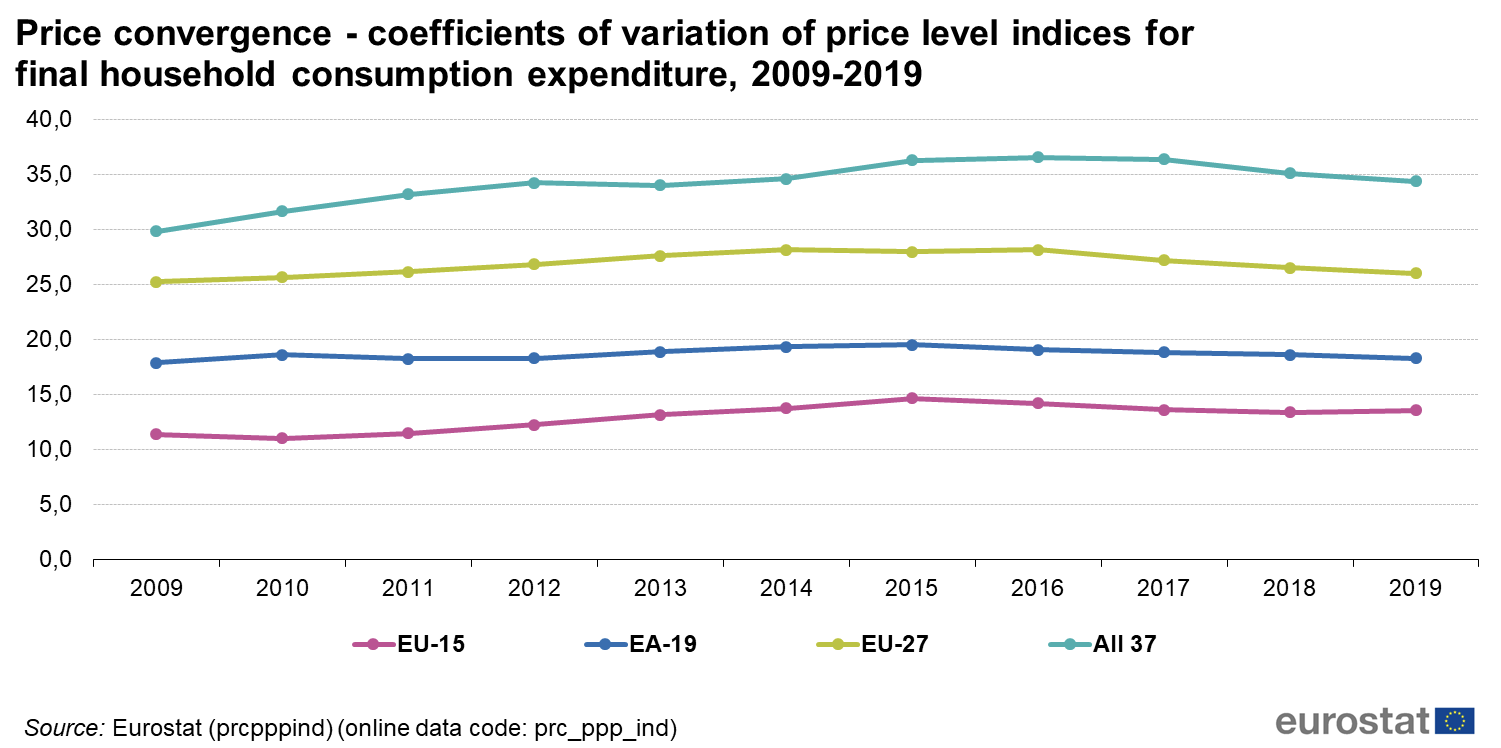


---

It depicts the Coefficients of Variation (CV) of the [PLI](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Glossary:Price_level_index_(PLI)) for total [HCFE](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Glossary:Household_final_consumption_expenditure_(HFCE)), over time. A decreasing CV of the coefficients of variation signals a price convergence; on the contrary, it depicts a divergence.

### 3.2 Coding

The script for extracting data is similar to the precedent sections. So, I get data through *eurostat.get_data_df*, selecting *prc_ppp_conv*; I pick the values referring to the Coefficient of Variation for PLI](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Glossary:Price_level_index_(PLI)),  *CV_PLI* and I filter the data for [HCFE](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Glossary:Household_final_consumption_expenditure_(HFCE)) (*E011*).
After that, I select the group countries used [here](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=File:Price_convergence_-_coefficients_of_variation_of_price_level_indices_for_final_household_consumption_expenditure,_2009-2019.png).

---

In [44]:
# Retrieving data
eu_conv = eurostat.get_data_df('prc_ppp_conv')

eu_conv_2 = eu_conv.loc[eu_conv['statinfo'] == "CV_PLI"]
final_conv = eu_conv_2.loc[eu_conv_2['ppp_cat'] == "E011"]
final_conv2 = final_conv.loc[(final_conv['geo\\time'] == "EU15") | (final_conv['geo\\time'] == 'EA19') |
                             (final_conv['geo\\time'] == 'EU27_2020')]
print(final_conv2.head())

   statinfo ppp_cat unit   geo\time  2019  2018  2017  2016  2015  2014  ...   \
20   CV_PLI    E011   PC       EA19  18.3  18.6  18.8  19.0  19.5  19.3  ...    
21   CV_PLI    E011   PC       EU15  13.6  13.4  13.6  14.2  14.6  13.8  ...    
24   CV_PLI    E011   PC  EU27_2020  26.0  26.5  27.2  28.2  28.0  28.1  ...    

    2004  2003  2002  2001  2000  1999  1998  1997  1996  1995  
20  24.5  25.6  25.2  25.0  24.6  26.7  27.2  28.6  31.6  34.9  
21  13.9  14.9  16.1  15.9  16.3  15.2  15.0  14.7  14.7  16.3  
24  32.5  33.8  32.6  33.0  33.8  36.0  35.5  37.8  41.3  42.9  

[3 rows x 29 columns]


---

Then, since I want to replicate the above line-chart, I transpose the dataset by *.T*. This operation will allow me to use years as *x-axis ticks*.

---

In [76]:
final_conv2_2=final_conv2[[2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009]]
final_conv2_t=final_conv2_2.T
print(final_conv2_t.head())

        20    21    24
2019  18.3  13.6  26.0
2018  18.6  13.4  26.5
2017  18.8  13.6  27.2
2016  19.0  14.2  28.2
2015  19.5  14.6  28.0


---

Before making the chart, I manipulate the dataset renaming the variables (that were named with the indexes' values), I reset the indexes and I add a column for assigning the years as a variable.

---

In [89]:
final_conv2_t.rename(columns = {20: 'EA19', 21:'EU15', 24:'EU27'}, inplace=True)
final_conv2_t2 = final_conv2_t.reset_index(drop=True)
final_conv2_t2['Years'] = [2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009]
print(final_conv2_t2)

    EA19  EU15  EU27  Years
0   18.3  13.6  26.0   2019
1   18.6  13.4  26.5   2018
2   18.8  13.6  27.2   2017
3   19.0  14.2  28.2   2016
4   19.5  14.6  28.0   2015
5   19.3  13.8  28.1   2014
6   18.8  13.2  27.6   2013
7   18.3  12.2  26.8   2012
8   18.2  11.5  26.1   2011
9   18.6  11.0  25.6   2010
10  17.9  11.4  25.2   2009


---

In conclusion, I plot the graph.

---

In [97]:
# Plotting
fig = go.Figure()
fig.add_trace(go.Scatter(x=final_conv2_t2['Years'], y=final_conv2_t2['EA19'],
                    mode='lines+markers',
                    name='EA19'))
fig.add_trace(go.Scatter(x=final_conv2_t2['Years'], y=final_conv2_t2['EU15'],
                    mode='lines+markers',
                    name='EU15'))
fig.add_trace(go.Scatter(x=final_conv2_t2['Years'], y=final_conv2_t2['EU27'],
                    mode='lines+markers',
                    name='EU27'))
fig.layout.template = 'plotly_white'
fig.update_xaxes(tickangle = 45)
fig.update_layout(
    title = "Price Convergence", showlegend = True)
fig.show()